In [2]:
import statistical_analysis_toolkit as stat_tools
import pandas as pd

Base on a p-value of 0.27709339467377836 there is None/Weak evidence against H0=0.0


,p_value_perm,p_value_t_test,number_of_obs,mean,std_dev,std_err,min,max,observed_diff,0.95_cl_mean,0.95_cl_std,t_value,t_value_perm,observed_t,df
summary_type,,,,,,,,,,,,,,,
Group-fired,NaN,NaN,21,45.8571,6.52139,1.42308,34,56,NaN,"[42.8886, 48.8256]","[4.9893, 9.4173]",2.08596,NaN,NaN,20
Group-not_fired,NaN,NaN,30,43.9333,5.88354,1.07418,27,54,NaN,"[41.7364, 46.1303]","[4.6857, 7.9093]",2.04523,NaN,NaN,29
POOLED,0.303,0.277093,51,1.92381,6.15188,1.75034,27,56,1.9238,"[-1.5936, 5.4413]","[5.1389, 7.6661]",2.00958,-1.03055,1.0991,49


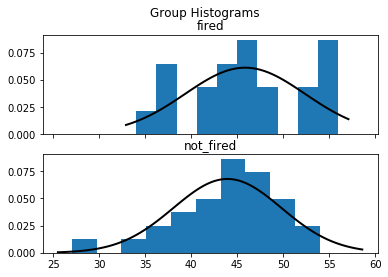

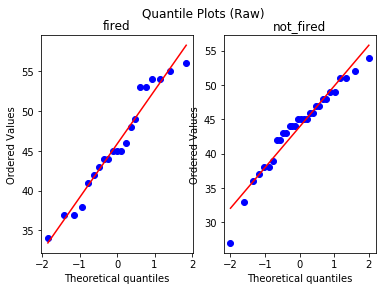

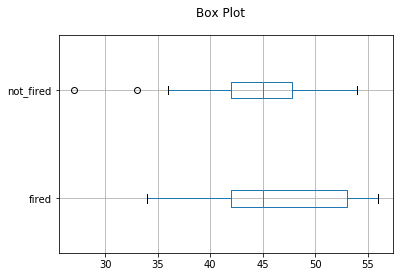

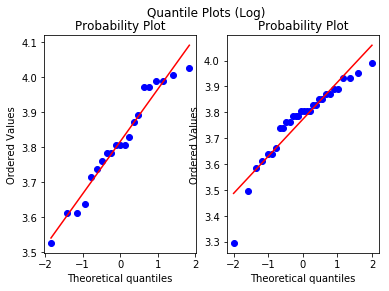

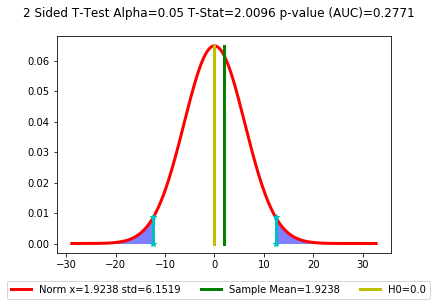

In [9]:
#que up some data
data = pd.DataFrame.from_dict({"fired":[34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56],
                               'not_fired':[27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54]}
                              , orient='index').T
#expected to have two columns (one for each sample, col_names = feature_names)
#null hyp (equal means)
h0 = 0.0
#95% CL
alpha = 0.05
p_val = analysis.loc['POOLED'].p_value_t_test
evidence = stat_tools.strength_of_evidence(p_val)
analysis = stat_tools.analyze_distribution(data, alpha=alpha, h0=h0)
print(f'Base on a p-value of {p_val} there is {evidence} evidence against H0={h0}')
analysis